# Data Science Challenge

In [ ]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [1]:
#Libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 101)


#Data Modeling
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Data Visualization
from scipy.stats import iqr
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [2]:
# Dataset is already loaded below
data = pd.read_csv("train.csv",  index_col='id')

In [3]:
#Loading the test data during data wrangling and visualization.
#The idea is to merge the test and train data for data preprocessing and 
#feature engineering
test_data = pd.read_csv("test.csv",  index_col='id')

In [4]:
data.head() #gives an insight of what train data looks like

,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
id,,,,,,,,,,,
13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [5]:
test_data.head() #gives insight on what test data looks like

,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
id,,,,,,,,,,
19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [6]:
#Explore columns
data.columns

Index(['region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [7]:
#Description
data.describe()

,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [8]:
data.info() #data info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2870 entries, 13232 to 2355
Data columns (total 11 columns):
region                 2870 non-null object
latitude               2870 non-null float64
longitude              2870 non-null float64
accommodation_type     2870 non-null object
cost                   2870 non-null int64
minimum_nights         2870 non-null int64
number_of_reviews      2870 non-null int64
reviews_per_month      2194 non-null float64
owner_id               2870 non-null int64
owned_hotels           2870 non-null int64
yearly_availability    2870 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 269.1+ KB


In [9]:
test_data.info() # test data info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 19215 to 13154
Data columns (total 10 columns):
region                718 non-null object
latitude              718 non-null float64
longitude             718 non-null float64
accommodation_type    718 non-null object
cost                  718 non-null int64
minimum_nights        718 non-null int64
number_of_reviews     718 non-null int64
reviews_per_month     545 non-null float64
owner_id              718 non-null int64
owned_hotels          718 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 61.7+ KB


In [10]:
#seprating the predicting feature and merging the test and train
temp=data['yearly_availability'] #Isolated
merging_data=data.drop(['yearly_availability'],axis=1)
total_data=pd.concat([merging_data,test_data])

## Function
***get_cat_num_features***
<ol>
    <li>Input: Dataframe</li>
    <li>Process: Creates two matrices: num_features, cat_features</li>
    <li>Returns: num_features for data types float64 or int64</li>
    <li>Returns: cat_features for all othre data types</li>
</ol>

In [11]:
#created this function to categories between numerical and categorical features
def get_cat_num_features(df):
    num_features = []
    cat_features = []
    for col in df.columns:
        if df[col].dtype=="float64" or df[col].dtype=="int64":
            num_features.append(col)
        else:
            cat_features.append(col)
    return num_features, cat_features
num_feat,cat_feat=get_cat_num_features(total_data)

In [12]:
num_feat # displays numerical feature column name in a list

['latitude',
 'longitude',
 'cost',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'owner_id',
 'owned_hotels']

In [13]:
cat_feat #displays categorical feature column name in a list

['region', 'accommodation_type']

In [14]:
total_data['region'].value_counts() # investigating categorical feature

Manhattan        1665
Brooklyn         1360
Queens            442
Bronx             101
Staten Island      20
Name: region, dtype: int64

In [15]:
total_data['accommodation_type'].value_counts() # investigating categorical feature

Private room       1512
Entire home/apt    1249
Shared room         827
Name: accommodation_type, dtype: int64

In [16]:
# Check for number of null values
nulls = total_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

reviews_per_month 849


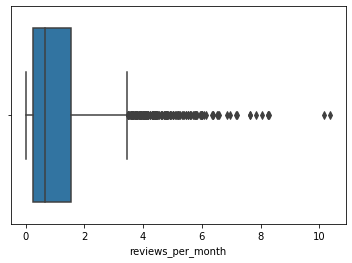

In [17]:
#check the distribution of the feature to determine which value to input
#in the missing row, if the row was evenly distributed then mean could be 
#used and if it is not evenly distributed then median should be used
sns.boxplot(x=data['reviews_per_month'])

In [19]:
#remove redundant features
total_data = total_data.drop([ 'owner_id'], axis=1)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3588 entries, 13232 to 13154
Data columns (total 9 columns):
region                3588 non-null object
latitude              3588 non-null float64
longitude             3588 non-null float64
accommodation_type    3588 non-null object
cost                  3588 non-null int64
minimum_nights        3588 non-null int64
number_of_reviews     3588 non-null int64
reviews_per_month     2739 non-null float64
owned_hotels          3588 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 280.3+ KB


## Handling missing data and creating new features for optimized model training

In [20]:
#create new features for optimized model training

total_data['reviews_per_month'] = total_data['reviews_per_month'].fillna(total_data['reviews_per_month'].median())
total_data['min_cost_booking'] = total_data['cost'] * total_data['minimum_nights']

total_data.head()

,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,min_cost_booking
id,,,,,,,,,,
13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,1,850
246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,1,195
19091,Queens,40.78573,-73.81062,Private room,85,1,0,0.65,1,85
34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,0.65,65,6300
444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,3,225


In [21]:
total_data['cost'].max()

9999

In [22]:
#binning the features together for model to recognize underlying patterns
total_data['cost_range'] = pd.cut(x=total_data['cost'], bins=[int(x) for x in range(9,10000,100)])
total_data['review_range'] = pd.cut(x=total_data['reviews_per_month'], bins=[int(x) for x in range(0,11,1)])
total_data['average_per_year'] = total_data['reviews_per_month'] * 12
total_data=pd.get_dummies(total_data,columns=cat_feat)


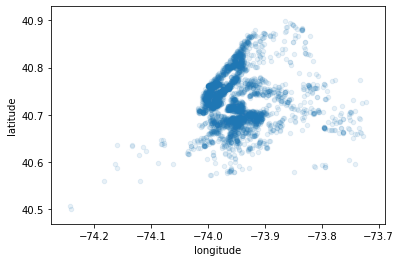

In [23]:
#Visualize the lattitude and logitude of NY to see the cost distribution
total_data.plot(kind="scatter", x='longitude', y='latitude', alpha=0.1) 

From the above scatterplot we can see that areas near hudson river have higher cost

In [24]:
num_feat,cat_feat=get_cat_num_features(total_data)

In [25]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3588 entries, 13232 to 13154
Data columns (total 19 columns):
latitude                              3588 non-null float64
longitude                             3588 non-null float64
cost                                  3588 non-null int64
minimum_nights                        3588 non-null int64
number_of_reviews                     3588 non-null int64
reviews_per_month                     3588 non-null float64
owned_hotels                          3588 non-null int64
min_cost_booking                      3588 non-null int64
cost_range                            3587 non-null category
review_range                          3586 non-null category
average_per_year                      3588 non-null float64
region_Bronx                          3588 non-null uint8
region_Brooklyn                       3588 non-null uint8
region_Manhattan                      3588 non-null uint8
region_Queens                         3588 non-null uint8
regi

In [29]:
total_data['review_range']

id
13232    (0, 1]
246      (2, 3]
19091    (0, 1]
34305    (0, 1]
444      (0, 1]
          ...  
26801    (1, 2]
20110    (1, 2]
31383    (4, 5]
47135    (0, 1]
13154    (0, 1]
Name: review_range, Length: 3588, dtype: category
Categories (10, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] ... (6, 7] < (7, 8] < (8, 9] < (9, 10]]

In [30]:
num_feat,cat_feat=get_cat_num_features(total_data)

In [33]:
#Replace null values with most frequest values
for col in cat_feat:
    total_data[col].fillna(total_data[col].mode()[0], inplace=True)
total_data[cat_feat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3588 entries, 13232 to 13154
Data columns (total 10 columns):
cost_range                            3588 non-null category
review_range                          3588 non-null category
region_Bronx                          3588 non-null uint8
region_Brooklyn                       3588 non-null uint8
region_Manhattan                      3588 non-null uint8
region_Queens                         3588 non-null uint8
region_Staten Island                  3588 non-null uint8
accommodation_type_Entire home/apt    3588 non-null uint8
accommodation_type_Private room       3588 non-null uint8
accommodation_type_Shared room        3588 non-null uint8
dtypes: category(2), uint8(8)
memory usage: 227.6 KB


In [34]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3588 entries, 13232 to 13154
Data columns (total 19 columns):
latitude                              3588 non-null float64
longitude                             3588 non-null float64
cost                                  3588 non-null int64
minimum_nights                        3588 non-null int64
number_of_reviews                     3588 non-null int64
reviews_per_month                     3588 non-null float64
owned_hotels                          3588 non-null int64
min_cost_booking                      3588 non-null int64
cost_range                            3588 non-null category
review_range                          3588 non-null category
average_per_year                      3588 non-null float64
region_Bronx                          3588 non-null uint8
region_Brooklyn                       3588 non-null uint8
region_Manhattan                      3588 non-null uint8
region_Queens                         3588 non-null uint8
regi

Skewness: 0.169131095548893
count    2870.000000
mean       40.731224
std         0.054942
min        40.507080
25%        40.692462
50%        40.728250
75%        40.762658
max        40.898730
Name: latitude, dtype: float64


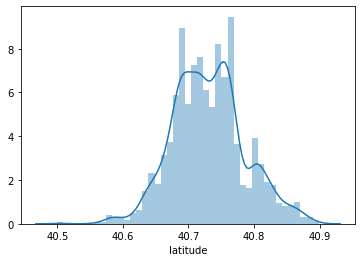

Skewness: 1.3609918383604311
count    2870.000000
mean      -73.950158
std         0.049745
min       -74.242850
25%       -73.984003
50%       -73.956720
75%       -73.934202
max       -73.721730
Name: longitude, dtype: float64


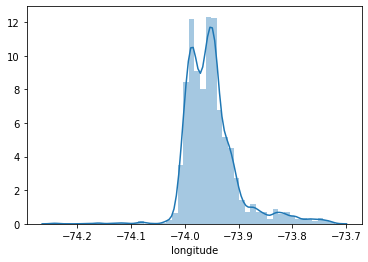

Skewness: 13.007762717769996
count    2870.000000
mean      195.943206
std       406.184714
min        10.000000
25%        75.000000
50%       120.000000
75%       200.000000
max      9999.000000
Name: cost, dtype: float64


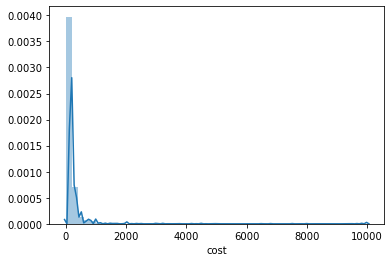

Skewness: 11.868853626861632
count    2870.000000
mean       11.530314
std        37.972339
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       999.000000
Name: minimum_nights, dtype: float64


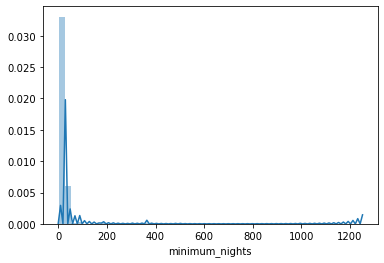

Skewness: 4.269781229176731
count    2870.000000
mean       16.315331
std        32.481722
min         0.000000
25%         1.000000
50%         4.000000
75%        16.000000
max       395.000000
Name: number_of_reviews, dtype: float64


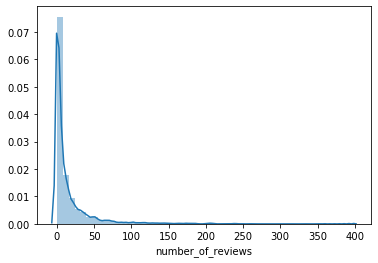

Skewness: 2.163592637012576
count    2194.000000
mean        1.157502
std         1.355028
min         0.010000
25%         0.240000
50%         0.650000
75%         1.530000
max        10.370000
Name: reviews_per_month, dtype: float64


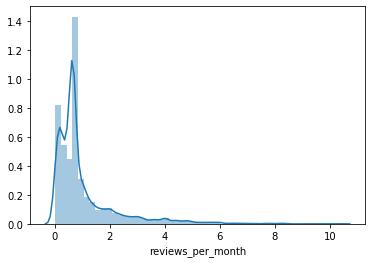

Skewness: 6.952521607216716
count    2870.000000
mean        8.411498
std        27.105522
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       327.000000
Name: owned_hotels, dtype: float64


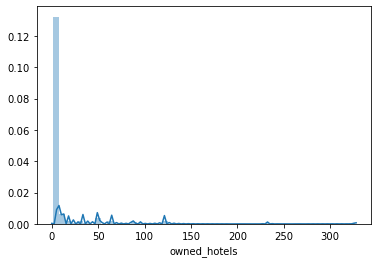

KeyError: 'min_cost_booking'

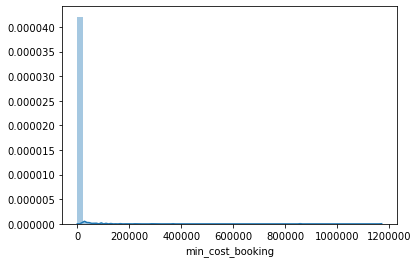

In [35]:
#visualizing the columns to check for data distribution
for col in num_feat:
    plt.tight_layout()
    sns.distplot(total_data[col])
    print("Skewness: "+str(data[col].skew()))
    print(data[col].describe())
    plt.show()

### I am not sure what the error is, if I had more time I would have investigated it.

In [36]:
total_data['min_cost_booking']

id
13232     850
246       195
19091      85
34305    6300
444       225
         ... 
26801     154
20110     435
31383     180
47135    6000
13154    5070
Name: min_cost_booking, Length: 3588, dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2870 entries, 13232 to 2355
Data columns (total 11 columns):
region                 2870 non-null object
latitude               2870 non-null float64
longitude              2870 non-null float64
accommodation_type     2870 non-null object
cost                   2870 non-null int64
minimum_nights         2870 non-null int64
number_of_reviews      2870 non-null int64
reviews_per_month      2194 non-null float64
owner_id               2870 non-null int64
owned_hotels           2870 non-null int64
yearly_availability    2870 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 269.1+ KB


In [38]:
num_feat,cat_feat=get_cat_num_features(total_data)

In [39]:
cat_df = total_data[cat_feat]
cat_data=pd.get_dummies(cat_df,columns=cat_feat)

In [40]:
cat_data.head()

,"cost_range_(9, 109]","cost_range_(109, 209]","cost_range_(209, 309]","cost_range_(309, 409]","cost_range_(409, 509]","cost_range_(509, 609]","cost_range_(609, 709]","cost_range_(709, 809]","cost_range_(809, 909]","cost_range_(909, 1009]","cost_range_(1009, 1109]","cost_range_(1109, 1209]","cost_range_(1209, 1309]","cost_range_(1309, 1409]","cost_range_(1409, 1509]","cost_range_(1509, 1609]","cost_range_(1609, 1709]","cost_range_(1709, 1809]","cost_range_(1809, 1909]","cost_range_(1909, 2009]","cost_range_(2009, 2109]","cost_range_(2109, 2209]","cost_range_(2209, 2309]","cost_range_(2309, 2409]","cost_range_(2409, 2509]","cost_range_(2509, 2609]","cost_range_(2609, 2709]","cost_range_(2709, 2809]","cost_range_(2809, 2909]","cost_range_(2909, 3009]","cost_range_(3009, 3109]","cost_range_(3109, 3209]","cost_range_(3209, 3309]","cost_range_(3309, 3409]","cost_range_(3409, 3509]","cost_range_(3509, 3609]","cost_range_(3609, 3709]","cost_range_(3709, 3809]","cost_range_(3809, 3909]","cost_range_(3909, 4009]","cost_range_(4009, 4109]","cost_range_(4109, 4209]","cost_range_(4209, 4309]","cost_range_(4309, 4409]","cost_range_(4409, 4509]","cost_range_(4509, 4609]","cost_range_(4609, 4709]","cost_range_(4709, 4809]","cost_range_(4809, 4909]","cost_range_(4909, 5009]",...,"cost_range_(7509, 7609]","cost_range_(7609, 7709]","cost_range_(7709, 7809]","cost_range_(7809, 7909]","cost_range_(7909, 8009]","cost_range_(8009, 8109]","cost_range_(8109, 8209]","cost_range_(8209, 8309]","cost_range_(8309, 8409]","cost_range_(8409, 8509]","cost_range_(8509, 8609]","cost_range_(8609, 8709]","cost_range_(8709, 8809]","cost_range_(8809, 8909]","cost_range_(8909, 9009]","cost_range_(9009, 9109]","cost_range_(9109, 9209]","cost_range_(9209, 9309]","cost_range_(9309, 9409]","cost_range_(9409, 9509]","cost_range_(9509, 9609]","cost_range_(9609, 9709]","cost_range_(9709, 9809]","cost_range_(9809, 9909]","review_range_(0, 1]","review_range_(1, 2]","review_range_(2, 3]","review_range_(3, 4]","review_range_(4, 5]","review_range_(5, 6]","review_range_(6, 7]","review_range_(7, 8]","review_range_(8, 9]","review_range_(9, 10]",region_Bronx_0,region_Bronx_1,region_Brooklyn_0,region_Brooklyn_1,region_Manhattan_0,region_Manhattan_1,region_Queens_0,region_Queens_1,region_Staten Island_0,region_Staten Island_1,accommodation_type_Entire home/apt_0,accommodation_type_Entire home/apt_1,accommodation_type_Private room_0,accommodation_type_Private room_1,accommodation_type_Shared room_0,accommodation_type_Shared room_1
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13232,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0
246,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0
19091,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0
34305,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0
444,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1


In [41]:
# Standardize the data based on their z-score
std_df = total_data[num_feat]
for stdCol in std_df.columns:
    std_df[stdCol] = (std_df[stdCol] - std_df[stdCol].mean()) / (std_df[stdCol].mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [42]:
std_df.head()

,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,min_cost_booking,average_per_year
id,,,,,,,,,
13232,-0.000301,0.000726,-0.121270,-0.570032,-0.562477,-0.463565,-0.881658,-0.718300,-0.463565
246,-0.002120,-0.000006,-0.664015,-0.742019,13.875777,1.203213,-0.881658,-0.935375,1.203213
19091,0.001348,-0.001895,-0.560635,-0.914006,-1.000000,-0.377353,-0.881658,-0.971830,-0.377353
34305,0.000192,0.000396,0.085490,1.579810,-1.000000,-0.377353,6.692206,1.087895,-0.377353
444,0.002294,-0.000060,-0.612325,-0.742019,1.375124,-0.597674,-0.644975,-0.925432,-0.597674


In [43]:
training_data = pd.concat([cat_data,std_df],axis=1)

In [44]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3588 entries, 13232 to 13154
Columns: 134 entries, cost_range_(9, 109] to average_per_year
dtypes: float64(9), uint8(125)
memory usage: 878.3 KB


In [45]:
#Dividing them back to train and test data
data2=training_data.iloc[2870:,:]
data=training_data.iloc[0:2870,:]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2870 entries, 13232 to 2355
Columns: 134 entries, cost_range_(9, 109] to average_per_year
dtypes: float64(9), uint8(125)
memory usage: 574.6 KB


## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [ ]:
#Loading Test data
#test_data=pd.read_csv('test.csv')
#test_data.head()

In [46]:
temp.shape

(2870,)

In [48]:
data.head()

,"cost_range_(9, 109]","cost_range_(109, 209]","cost_range_(209, 309]","cost_range_(309, 409]","cost_range_(409, 509]","cost_range_(509, 609]","cost_range_(609, 709]","cost_range_(709, 809]","cost_range_(809, 909]","cost_range_(909, 1009]","cost_range_(1009, 1109]","cost_range_(1109, 1209]","cost_range_(1209, 1309]","cost_range_(1309, 1409]","cost_range_(1409, 1509]","cost_range_(1509, 1609]","cost_range_(1609, 1709]","cost_range_(1709, 1809]","cost_range_(1809, 1909]","cost_range_(1909, 2009]","cost_range_(2009, 2109]","cost_range_(2109, 2209]","cost_range_(2209, 2309]","cost_range_(2309, 2409]","cost_range_(2409, 2509]","cost_range_(2509, 2609]","cost_range_(2609, 2709]","cost_range_(2709, 2809]","cost_range_(2809, 2909]","cost_range_(2909, 3009]","cost_range_(3009, 3109]","cost_range_(3109, 3209]","cost_range_(3209, 3309]","cost_range_(3309, 3409]","cost_range_(3409, 3509]","cost_range_(3509, 3609]","cost_range_(3609, 3709]","cost_range_(3709, 3809]","cost_range_(3809, 3909]","cost_range_(3909, 4009]","cost_range_(4009, 4109]","cost_range_(4109, 4209]","cost_range_(4209, 4309]","cost_range_(4309, 4409]","cost_range_(4409, 4509]","cost_range_(4509, 4609]","cost_range_(4609, 4709]","cost_range_(4709, 4809]","cost_range_(4809, 4909]","cost_range_(4909, 5009]",...,"cost_range_(8409, 8509]","cost_range_(8509, 8609]","cost_range_(8609, 8709]","cost_range_(8709, 8809]","cost_range_(8809, 8909]","cost_range_(8909, 9009]","cost_range_(9009, 9109]","cost_range_(9109, 9209]","cost_range_(9209, 9309]","cost_range_(9309, 9409]","cost_range_(9409, 9509]","cost_range_(9509, 9609]","cost_range_(9609, 9709]","cost_range_(9709, 9809]","cost_range_(9809, 9909]","review_range_(0, 1]","review_range_(1, 2]","review_range_(2, 3]","review_range_(3, 4]","review_range_(4, 5]","review_range_(5, 6]","review_range_(6, 7]","review_range_(7, 8]","review_range_(8, 9]","review_range_(9, 10]",region_Bronx_0,region_Bronx_1,region_Brooklyn_0,region_Brooklyn_1,region_Manhattan_0,region_Manhattan_1,region_Queens_0,region_Queens_1,region_Staten Island_0,region_Staten Island_1,accommodation_type_Entire home/apt_0,accommodation_type_Entire home/apt_1,accommodation_type_Private room_0,accommodation_type_Private room_1,accommodation_type_Shared room_0,accommodation_type_Shared room_1,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,min_cost_booking,average_per_year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13232,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,-0.000301,0.000726,-0.121270,-0.570032,-0.562477,-0.463565,-0.881658,-0.718300,-0.463565
246,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,-0.002120,-0.000006,-0.664015,-0.742019,13.875777,1.203213,-0.881658,-0.935375,1.203213
19091,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0.001348,-0.001895,-0.560635,-0.914006,-1.000000,-0.377353,-0.881658,-0.971830,-0.377353
34305,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0.000192,0.000396,0.085490,1.579810,-1.000000,-0.377353,6.692206,1.087895,-0.377353
444,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0.002294,-0.000060,-0.612325,-0.742019,1.375124,-0.597674,-0.644975,-0.925432,-0.597674


In [49]:
#Split the training data to test and train
x_train, x_test, y_train, y_test = train_test_split(data, temp, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [51]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
probs_y=logmodel.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
from sklearn import metrics
lr_accuracy = metrics.accuracy_score(probs_y, y_test)
print(lr_accuracy)

0.8548199767711963


In [55]:
#Classification report
print(metrics.classification_report(y_test, probs_y))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       437
           1       0.86      0.84      0.85       424

    accuracy                           0.85       861
   macro avg       0.86      0.85      0.85       861
weighted avg       0.86      0.85      0.85       861



In [94]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier(criterion='entropy')
treemodel.fit(x_train, y_train)
tree_pred=treemodel.predict(x_test)
tree_accuracy = metrics.accuracy_score(tree_pred, y_test)
print(tree_accuracy)

0.8664343786295006


In [99]:
from sklearn.ensemble import RandomForestClassifier
ensemblemodel = RandomForestClassifier()
ensemblemodel.fit(x_train, y_train)
ensemble_pred=ensemblemodel.predict(x_test)
ens_accuracy = metrics.accuracy_score(ensemble_pred, y_test)
print(ens_accuracy)

0.9094076655052264


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [86]:
print(metrics.classification_report(y_test, ensemble_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       437
           1       0.89      0.89      0.89       424

    accuracy                           0.89       861
   macro avg       0.89      0.89      0.89       861
weighted avg       0.89      0.89      0.89       861



In [58]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

#running knn in a loop to check for most appropriate k value
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

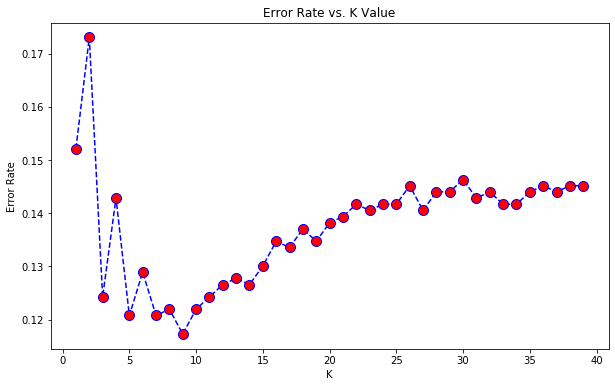

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [60]:
#kNN model
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
pred_3 = knn.predict(x_test)
knn_accuracy = metrics.accuracy_score(pred_3, y_test)
print(knn_accuracy)

0.8826945412311266


## Out of all the models used, random forest gave the higest accuracy of 90.9%



**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [63]:
dict(reversed(sorted(zip(ensemblemodel.feature_importances_, x_train.columns.values))))

{0.16724564916385393: 'accommodation_type_Private room_1',
 0.11250839663559384: 'accommodation_type_Entire home/apt_1',
 0.09655468180070167: 'accommodation_type_Private room_0',
 0.08362694143858493: 'accommodation_type_Entire home/apt_0',
 0.08327953129910964: 'owned_hotels',
 0.05166071308197795: 'min_cost_booking',
 0.04980062084196877: 'number_of_reviews',
 0.04891191139827451: 'reviews_per_month',
 0.04864144541618288: 'average_per_year',
 0.044539514370695546: 'minimum_nights',
 0.03845399488567622: 'latitude',
 0.03723001753955835: 'longitude',
 0.02722682288950929: 'cost',
 0.02661628239839308: 'accommodation_type_Shared room_0',
 0.01278600252997091: 'review_range_(0, 1]',
 0.010458613773313401: 'accommodation_type_Shared room_1',
 0.006049752356366704: 'cost_range_(109, 209]',
 0.005468207799952071: 'cost_range_(9, 109]',
 0.005065594298822111: 'region_Manhattan_0',
 0.004349934280810165: 'region_Brooklyn_1',
 0.004309422996527016: 'region_Brooklyn_0',
 0.004070870496112532

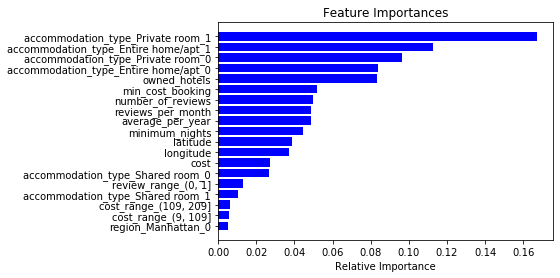

In [64]:
features = x_train.columns
importances = ensemblemodel.feature_importances_
indices = np.argsort(importances)[-19:]  # top 20 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [ ]:
x_ = x_train[['accommodation_type_Private room_1', 'accommodation_type_Entire home/apt_1',
            'accommodation_type_Private room_0', 'accommodation_type_Entire home/apt_0',
            'owned_hotels', 'min_cost_booking', 'number_of_reviews', 'reviews_per_month',
            'average_per_year', 'minimum_nights', 'latitude', 'longitude',
            'cost', 'accommodation_type_Shared room_0', 'review_range_(0, 1]', 
            'accommodation_type_Shared room_1', 'cost_range_(109, 209]',
            'cost_range_(9, 109]', 'region_Manhattan_0']]

In [67]:
enstest = RandomForestClassifier()
enstest.fit(x_train, y_train)
e_pred=enstest.predict(x_test)
ens_acc = metrics.accuracy_score(e_pred, y_test)
print(ens_acc)

0.9001161440185831


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [101]:
#Predit the yearly availability and save as csv file for submission
y_pred=ensemblemodel.predict(data2)
print(y_pred)

[0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1
 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0
 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1
 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1
 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1
 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0
 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0
 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1
 0 0 1 1 0 0 0 0 0 0 1 1 

In [102]:
submission_df = pd.DataFrame({'id': data2.index, 
                              'yearly_availability': y_pred})

In [103]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---